In [1]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

In [2]:
def end(i):
    if i in [0,1]:
        end=','
    if i is 2:
        end=', and'
    if i is 3:
        end='.'
    return end

# parsec s11

In [3]:
path=work_path+"sample/heb/sharpness/sharma16/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim, ellim, ulim, eulim = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim[i] = data['para_fit'][1]
    ellim[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim[i] = para_fitmax[-1]
#     ellim[i] =  data['e_para_fit'][1]

    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim[i], eulim[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim[i]*100, eulim[i]*100, lnames[i])+end(i))

print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim[i]*100, ellim[i]*100, lnames[i])+end(i))

The upper limits are
$1.28\%\pm0.04\%$ (\Dnu{}),
$2.25\%\pm0.11\%$ (\numax{}),
$8.78\%\pm0.38\%$ ($M$), and
$2.09\%\pm0.08\%$ ($R$).
The lower limits are
$0.25\%\pm0.21\%$ (\Dnu{}),
$0.21\%\pm0.31\%$ (\numax{}),
$1.29\%\pm1.40\%$ ($M$), and
$0.04\%\pm0.05\%$ ($R$).


### Are the scatters of mass and radius expected?

In [4]:
# expressed in fractional form
def get_emass_eradius(enumax, ednu, et):
    emass = ((3*enumax)**2.0+(-4*ednu)**2.0+(1.5*et)**2.0)**0.5
    eradius = ((1*enumax)**2.0+(-2*ednu)**2.0+(0.5*et)**2.0)**0.5
    return np.array([emass, eradius])

print('Expect mass and radius scatter, ', get_emass_eradius(ulim[0], ulim[1], 100.0/5000)*100)
print('Observed mass and radius scatter, ', ulim[2:]*100)

print('Expect mass and radius scatter, ', get_emass_eradius(llim[0], llim[1], 100.0/5000)*100)
print('Observed mass and radius scatter, ', llim[2:]*100)

print('Expect mass and radius scatter, ', get_emass_eradius(ulim[0]-llim[0], ulim[1]-llim[1], 70.0/5000)*100)
print('Observed mass and radius scatter, ', (ulim[2:]-llim[2:])*100)

Expect mass and radius scatter,  [10.23709915  4.78488698]
Observed mass and radius scatter,  [8.77826825 2.09078034]
Expect mass and radius scatter,  [3.20533696 1.11267757]
Observed mass and radius scatter,  [1.28729708 0.04084289]
Expect mass and radius scatter,  [8.97908796 4.26871365]
Observed mass and radius scatter,  [7.49097117 2.04993746]


# parsec scaling

In [5]:
path=work_path+"sample/heb/sharpness/kb95/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim1, ellim1, ulim1, eulim1 = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim1[i] = data['para_fit'][1]
    ellim1[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim1[i] = para_fitmax[-1]
#     ellim1[i] =  data['e_para_fit'][1]
    
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim1[i], eulim1[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim1[i]*100, eulim1[i]*100, lnames[i])+end(i))
print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim1[i]*100, ellim1[i]*100, lnames[i])+end(i))

The upper limits are
$1.25\%\pm0.05\%$ (\Dnu{}),
$2.23\%\pm0.12\%$ (\numax{}),
$9.10\%\pm0.50\%$ ($M$), and
$2.01\%\pm0.05\%$ ($R$).
The lower limits are
$0.13\%\pm0.18\%$ (\Dnu{}),
$0.72\%\pm0.24\%$ (\numax{}),
$2.34\%\pm1.38\%$ ($M$), and
$0.22\%\pm0.12\%$ ($R$).


# parsec scaling handpick errors (combo)

The upper limits handpicking errors are
$\pm0.06\%$ (\Dnu{}),
$\pm0.10\%$ (\numax{}),
$\pm0.65\%$ ($M$), and
$\pm0.06\%$ ($R$).
The lower limits handpicking errors are
$\pm1.63\%$ (\Dnu{}),
$\pm0.42\%$ (\numax{}),
$\pm5.52\%$ ($M$), and
$\pm5.17\%$ ($R$).


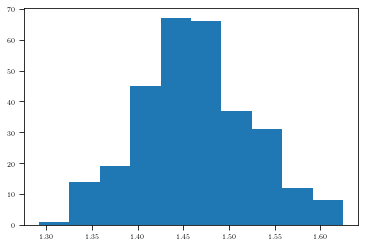

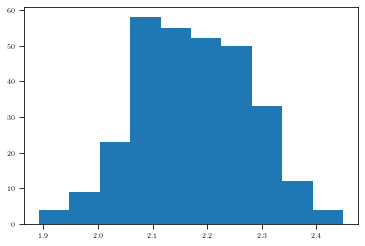

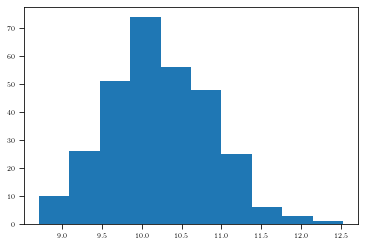

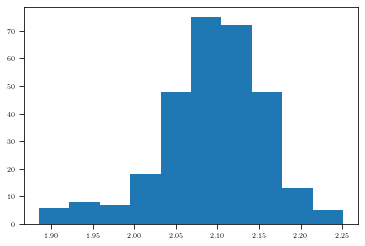

In [6]:
path=work_path+"sample/heb/sharpness/kb95combo/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
ellim1h, eulim1h = [np.zeros(4) for i in range(2)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    ps = np.array([d[1] for d in data['para_fitmax']])
    if i==2: a=ps
    idx = (ps != 0.08) & (ps != 0.20) & (ps != 0.005)
    ellim1h[i] = np.std(ps[idx])
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ps = np.array([d[1] for d in data['para_fitmax']])
    if i==2: b=ps
    plt.figure()
    plt.hist(ps*100)
    idx = (ps != 0.08) & (ps != 0.20) & (ps != 0.005)
    eulim1h[i] = np.std(ps[idx])

print('The upper limits handpicking errors are')
for i in range(4):
    print("$\pm{:0.2f}\%$ ({:s})".format(eulim1h[i]*100, lnames[i])+end(i))
print('The lower limits handpicking errors are')
for i in range(4):
    print("$\pm{:0.2f}\%$ ({:s})".format(ellim1h[i]*100, lnames[i])+end(i))

In [7]:
# i=3
# data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
# ps = np.array([d[1] for d in data['para_fitmax']])
# ps
# # np.std(ps)

In [8]:
# expressed in fractional form
def get_emass_eradius(enumax, ednu, et):
    emass = ((3*enumax)**2.0+(-4*ednu)**2.0+(1.5*et)**2.0)**0.5
    eradius = ((1*enumax)**2.0+(-2*ednu)**2.0+(0.5*et)**2.0)**0.5
    return np.array([emass, eradius])

# print('Expect mass and radius scatter, ', get_emass_eradius(ulim1[0], ulim1[1], 100.0/5000)*100)
# print('Observed mass and radius scatter, ', ulim1[2:]*100)


print('Observed random errors, ')
for i in range(4):
    print("${:0.2f}\%$ ({:s})".format((ulim1[i]-llim1[i])*100, lnames[i])+end(i))

print('Expect mass and radius random errors, ', 
get_emass_eradius(ulim1[0]-llim1[0], ulim1[1]-llim1[1], 0.)*100)


Observed random errors, 
$1.12\%$ (\Dnu{}),
$1.51\%$ (\numax{}),
$6.76\%$ ($M$), and
$1.80\%$ ($R$).
Expect mass and radius random errors,  [6.90791933 3.22003276]


# MIST s11

In [9]:
path=work_path+"sample/heb/sharpness/mistsharma16/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim2, ellim2, ulim2, eulim2 = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim2[i] = data['para_fit'][1]
    ellim2[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim2[i] = para_fitmax[-1]
#     ellim2[i] =  data['e_para_fit'][1]
    
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim2[i], eulim2[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim2[i]*100, eulim2[i]*100, lnames[i])+end(i))

print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim2[i]*100, ellim2[i]*100, lnames[i])+end(i))

The upper limits are
$1.43\%\pm0.04\%$ (\Dnu{}),
$2.94\%\pm0.09\%$ (\numax{}),
$7.48\%\pm0.34\%$ ($M$), and
$2.23\%\pm0.05\%$ ($R$).
The lower limits are
$0.72\%\pm0.04\%$ (\Dnu{}),
$1.16\%\pm0.10\%$ (\numax{}),
$1.61\%\pm1.73\%$ ($M$), and
$0.07\%\pm0.08\%$ ($R$).


# MIST kb95

In [10]:
path=work_path+"sample/heb/sharpness/mistkb95/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim3, ellim3, ulim3, eulim3 = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim3[i] = data['para_fit'][1]
    ellim3[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim3[i] = para_fitmax[-1]
#     ellim3[i] =  data['e_para_fit'][1]
    
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim3[i], eulim3[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim3[i]*100, eulim3[i]*100, lnames[i])+end(i))

print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim3[i]*100, ellim3[i]*100, lnames[i])+end(i))

The upper limits are
$1.56\%\pm0.04\%$ (\Dnu{}),
$2.99\%\pm0.19\%$ (\numax{}),
$7.00\%\pm0.54\%$ ($M$), and
$2.29\%\pm0.07\%$ ($R$).
The lower limits are
$0.89\%\pm0.11\%$ (\Dnu{}),
$1.52\%\pm0.09\%$ (\numax{}),
$0.28\%\pm0.32\%$ ($M$), and
$0.08\%\pm0.14\%$ ($R$).


# kallinger s11

In [11]:
path=work_path+"sample/heb/sharpness/ka18sharma16/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim4, ellim4, ulim4, eulim4 = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim4[i] = data['para_fit'][1]
    ellim4[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim2[i] = para_fitmax[-1]
#     ellim2[i] =  data['e_para_fit'][1]
    
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim4[i], eulim4[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim4[i]*100, eulim4[i]*100, lnames[i])+end(i))

print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim4[i]*100, ellim4[i]*100, lnames[i])+end(i))

The upper limits are
$0.14\%\pm0.10\%$ (\Dnu{}),
$0.55\%\pm0.19\%$ (\numax{}),
$5.60\%\pm0.44\%$ ($M$), and
$1.40\%\pm0.09\%$ ($R$).
The lower limits are
$0.15\%\pm0.11\%$ (\Dnu{}),
$0.21\%\pm0.26\%$ (\numax{}),
$4.16\%\pm0.58\%$ ($M$), and
$0.26\%\pm0.20\%$ ($R$).


# kallinger kb95

In [12]:
path=work_path+"sample/heb/sharpness/ka18kb95/"
relations = ["dnu", "numax", "mass", "radius"]
names = ["$\Delta\\nu$", "$\\nu_{\\rm max}$", "$M$", "$R$"]
lnames = ["\Dnu{}", "\\numax{}", "$M$", "$R$"]
llim5, ellim5, ulim5, eulim5 = [np.zeros(4) for i in range(4)]
for i in range(4):
    data = np.load(path+relations[i]+"/llim/data.npy",allow_pickle=True).tolist()
    llim5[i] = data['para_fit'][1]
    ellim5[i] =  data['e_para_fit'][1]
    
#     para_fitmax = np.zeros(2)
#     for ipara in range(2):
#         n, bins = np.histogram(data['samples'][:,ipara], 80)
#         idx = np.where(n == n.max())[0][0]
#         para_fitmax[ipara] = bins[idx:idx+1].mean()     
#     llim2[i] = para_fitmax[-1]
#     ellim2[i] =  data['e_para_fit'][1]
    
    
    data = np.load(path+relations[i]+"/ulim/data.npy",allow_pickle=True).tolist()
    ulim5[i], eulim5[i] = data['para_fit'][1], data['e_para_fit'][1]

print('The upper limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(ulim5[i]*100, eulim5[i]*100, lnames[i])+end(i))

print('The lower limits are')
for i in range(4):
    print("${:0.2f}\%\pm{:0.2f}\%$ ({:s})".format(llim5[i]*100, ellim5[i]*100, lnames[i])+end(i))

The upper limits are
$0.27\%\pm0.09\%$ (\Dnu{}),
$0.56\%\pm0.20\%$ (\numax{}),
$5.16\%\pm0.43\%$ ($M$), and
$1.51\%\pm0.11\%$ ($R$).
The lower limits are
$0.17\%\pm0.12\%$ (\Dnu{}),
$0.21\%\pm0.30\%$ (\numax{}),
$3.68\%\pm0.60\%$ ($M$), and
$0.59\%\pm0.32\%$ ($R$).


# plot

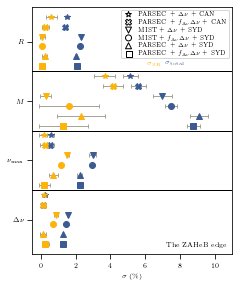

In [18]:
fig = plt.figure(figsize=mnras_size(ratio=1.2))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
ind = np.arange(4)*1.2
axes[0].errorbar(ulim*100, ind-0.5,  xerr=eulim*100, color=blue, marker="s", **errstyle)
axes[0].errorbar(llim*100, ind-0.5,  xerr=ellim*100, color=orange, marker="s", **errstyle)

axes[0].errorbar(ulim1*100, ind-0.3,  xerr=eulim1*100, color=blue, marker="^", **errstyle)
axes[0].errorbar(llim1*100, ind-0.3,  xerr=ellim1*100, color=orange, marker="^", **errstyle)
# axes[0].errorbar(ulim1*100, ind-0.3,  xerr=eulim1h*100, color=black, marker="^", **errstyle)
# axes[0].errorbar(llim1*100, ind-0.3,  xerr=ellim1h*100, color=black, marker="^", **errstyle)

axes[0].errorbar(ulim2*100, ind-0.1,  xerr=eulim2*100, color=blue, marker="o", **errstyle)
axes[0].errorbar(llim2*100, ind-0.1,  xerr=ellim2*100, color=orange, marker="o", **errstyle)

axes[0].errorbar(ulim3*100, ind+0.1,  xerr=eulim3*100, color=blue, marker="v", **errstyle)
axes[0].errorbar(llim3*100, ind+0.1,  xerr=ellim3*100, color=orange, marker="v", **errstyle)

axes[0].errorbar(ulim4*100, ind+0.3,  xerr=eulim4*100, color=blue, marker="X", **errstyle)
axes[0].errorbar(llim4*100, ind+0.3,  xerr=ellim4*100, color=orange, marker="X", **errstyle)

axes[0].errorbar(ulim5*100, ind+0.5,  xerr=eulim5*100, color=blue, marker="*", **errstyle)
axes[0].errorbar(llim5*100, ind+0.5,  xerr=ellim5*100, color=orange, marker="*", **errstyle)

axes[0].scatter(100,100,marker="*",
                 label="PARSEC + $\\Delta\\nu$ + CAN", facecolor='none', edgecolor='black')
axes[0].scatter(100,100,marker="X",
                 label="PARSEC + $f_{\\Delta\\nu}\\Delta\\nu$ + CAN", facecolor='none', edgecolor='black')
axes[0].scatter(100,100,marker="v",
                 label="MIST + $\\Delta\\nu$ + SYD", facecolor='none', edgecolor='black')
axes[0].scatter(100,100,marker="o",
                 label="MIST + $f_{\\Delta\\nu}\\Delta\\nu$ + SYD", facecolor='none', edgecolor='black')
axes[0].scatter(100,100,marker="^",
                 label="PARSEC + $\\Delta\\nu$ + SYD", facecolor='none', edgecolor='black')
axes[0].scatter(100,100,marker="s",
                 label="PARSEC + $f_{\\Delta\\nu}\\Delta\\nu$ + SYD", facecolor='none', edgecolor='black')


axes[0].text(6.5, 3.1, '$\\sigma_{\\rm SR}$', color=orange, ha='center', va='bottom')
axes[0].text(7.7, 3.1, '$\\sigma_{\\rm total}$', color=blue, ha='center', va='bottom')


axes[0].set_yticks(ind)
axes[0].set_yticklabels(names)
axes[0].set_xlabel("$\\sigma$ (\%)")
axes[0].legend()
axes[0].set_xlim(-0.5, 11.)
axes[0].set_ylim(np.min(ind)-0.7, np.max(ind)+0.7)
for hor in (ind[1:]+ind[:-1])/2.:
    axes[0].axhline(hor, color='black', linestyle='-', linewidth=1)
axes[0].text(0.97,0.05, 'The ZAHeB edge', va='top', ha='right', transform=axes[0].transAxes)
plt.tight_layout()
plt.savefig(overleaf_path+'limits_heb.pdf')

ind